In [2]:
import pandas as pd
import datetime as dt
import numpy as np
df= pd.read_csv('ride_sharing_new.csv')
print(df.info())
print(df['user_type'].describe())
# 1 for free riders.
# 2 for pay per ride.
# 3 for monthly subscribers.
df['user_type_cat']= df['user_type'].astype('category')
assert df.user_type_cat.dtype== 'category'
print(df['user_type_cat'].describe())

## remove 'minutes' from the column to only have numbers 
df['duration_trim']= df['duration'].str.strip('minutes')
df['duration_time']= df['duration_trim'].astype('int')
assert df['duration_time'].dtype== 'int'
print(df[['duration','duration_trim','duration_time']])
print(df['duration_time'].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
 10  tire_sizes       25760 non-null  object
 11  ride_date        25760 non-null  object
 12  ride_id          25760 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.6+ MB
None
count    25760.000000
mean         2.008230
std          0.704487
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max    

In [2]:
df['tire_sizes'].describe()
df['tire_sizes']= df['tire_sizes'].astype('string')
df['tire_sizes']= df['tire_sizes'].str.strip('"')
df['tire_sizes']= df['tire_sizes'].astype('int')
#Set all values from the column tire_sizes above 27 to 27 
df.loc[df['tire_sizes']>27, 'tire_sizes']= '27' 
#Reconvert back to category
df['tire_sizes'] = df['tire_sizes'].astype('category')
#SHows the unique values and how many 
display(df.groupby('tire_sizes').count())


print(df['tire_sizes'].unique)
df['ride_dt'] = pd.to_datetime(df['ride_date'])
today= dt.date.today()
today= pd.to_datetime(today)
df.loc[df['ride_dt'] > today, 'ride_dt'] = today
print(df['ride_dt'].max())

duplicates = df.duplicated(subset= 'ride_id', keep= False)
duplicated_rides = df[duplicates].sort_values('ride_id')
print(duplicated_rides[['ride_id','duration_trim','user_birth_year']])

# Drop complete duplicates from ride_sharing
ride_dup = df.drop_duplicates()
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_trim': 'mean'}
# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').aggregate(statistics).reset_index()
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]
duplicated_rides
assert duplicated_rides.shape[0] == 0


,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,ride_date,ride_id,user_type_cat,duration_trim,duration_time
tire_sizes,,,,,,,,,,,,,,,
26,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768,6768
27,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194,15194
27,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798,3798


<bound method Series.unique of 0        26
1        26
2        26
3        26
4        26
         ..
25755    26
25756    26
25757    26
25758    27
25759    27
Name: tire_sizes, Length: 25760, dtype: category
Categories (3, object): [26, 27, '27']>
2021-11-03 00:00:00
   ride_id duration_trim  user_birth_year
0        4            4              1979
4        4            4              1979
1        5           11              1994
5        5           11              1994
2        6           10              1979
6        6           10              1979
3        7           16              1981
7        7           16              1981


In [3]:
airlines= pd.read_csv('airlines_final.csv')
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety']. unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

categories= pd.read_csv('categories.csv')
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

print(categories)
# Print rows with inconsistent category
print(airlines[cat_clean_rows])
# Print rows with consistent categories only
#print(airlines[~cat_clean_rows])

Cleanliness:  ['Clean' 'Averag' 'Somewhat clean' 'Average' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
   Unnamed: 0    id       day airline  destination dest_region dest_size  \
2           2  2820  Thursday   DELTA  LOS ANGELES     West US       Hub   

  boarding_area   dept_time  wait_min cleanliness         safety satisfaction  \
2   Gates 40-48  12/31/2018        70      Averag  Somewhat safe      Neutral   

          full_name            survey_response  
2  Miss Eliza

In [4]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())


label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday', 'Friday': 'weekday', 'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","", regex=False)

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","", regex=False)

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","", regex=False)

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","", regex=False)

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']
3           Para la siguiente vez mejor salto del avion 
6       Deberian de pagar por viajar por esta aerolinea 
10          Para la siguiente vez mejor salto del avion 
13      Deberian de pagar por viajar por esta aerolinea 
17          Para la siguiente vez mejor salto del avion 
                              ...                       
2460        Para la siguiente vez mejor salto del avion 
2463    Deberian de pagar por viajar por esta aerolinea 
2467        Para la siguiente vez mejor salto del avion 
2470    Deberian de pagar por v

In [3]:
banking= pd.read_csv('bankingcust.csv')
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'
euro= banking[banking['acct_cur'] == 'euro']
# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
banking.loc[acct_eu, 'acct_cur'] = 'dollar'
assert banking['acct_cur'].unique() == 'dollar'

print(banking['account_opened'].head())
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'], infer_datetime_format = True, errors = 'coerce') 
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

print(banking['acct_year'].head())

#CROSS FIELD VALIDATION
flights= pd.read_csv('flights.csv ')
sum_classes= flights[['economy_class', 'business_class', 'first_class']].sum(axis=1)
passenger_equ= sum_classes == flights['total_passengers']
## Find and filter rows with inconsistent passengers 
inconsistent_pass= flights[~passenger_equ]
consistent_pass= flights[passenger_equ]
consistent_pass

0    3/5/2018
1    21-01-18
2    26-01-18
3    21-08-17
4    5/6/2017
Name: account_opened, dtype: object
0    2018
1     NaN
2     NaN
3     NaN
4    2017
Name: acct_year, dtype: object


,Unnamed: 0,flight_number,economy_class,business_class,first_class,total_passengers
0,0,DL140,100,60,40,200
1,1,BA248,130,100,70,300
2,2,MEA124,100,50,50,200
3,3,AFR939,140,70,90,300
4,4,TKA101,130,100,20,250


In [4]:
bank= pd.read_csv('banking_dirty.csv')
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = bank[fund_columns].sum(axis = 1) == bank['inv_amount']
# Store consistent and inconsistent data
consistent_inv = bank[inv_equ]
inconsistent_inv = bank[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


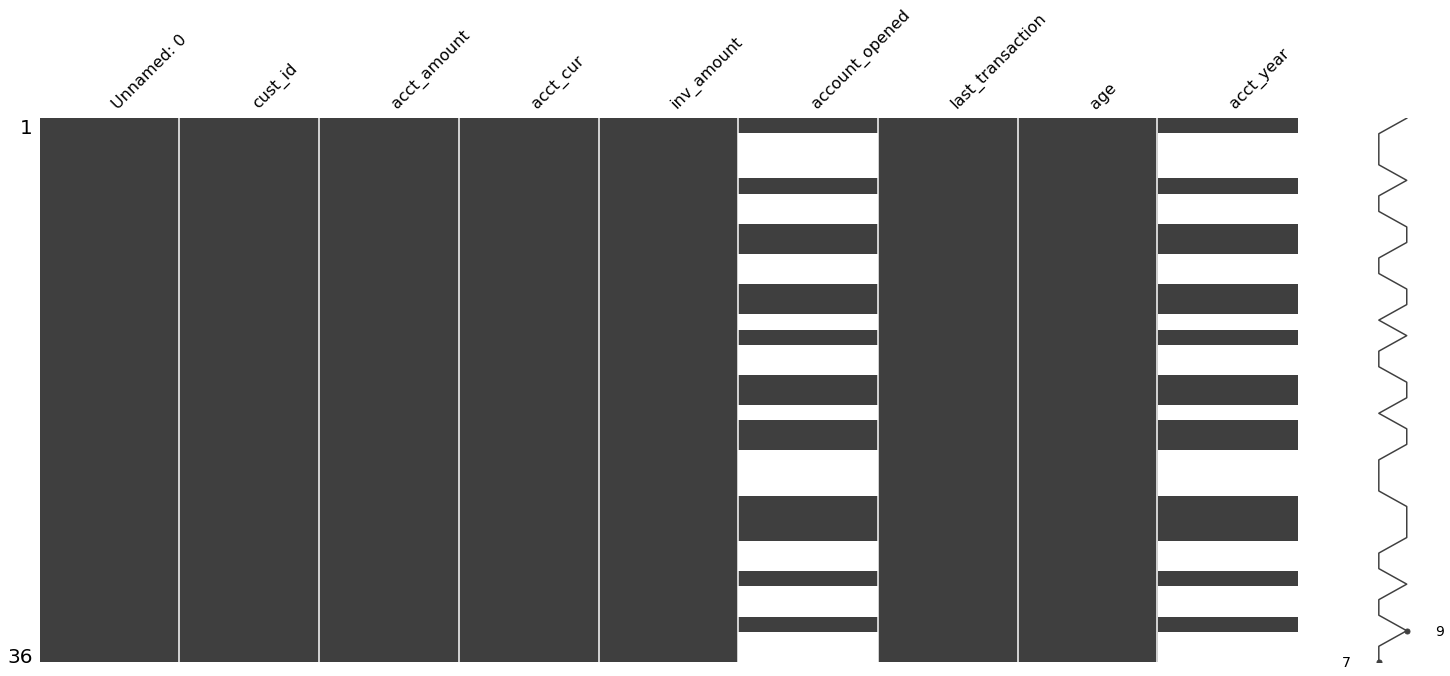

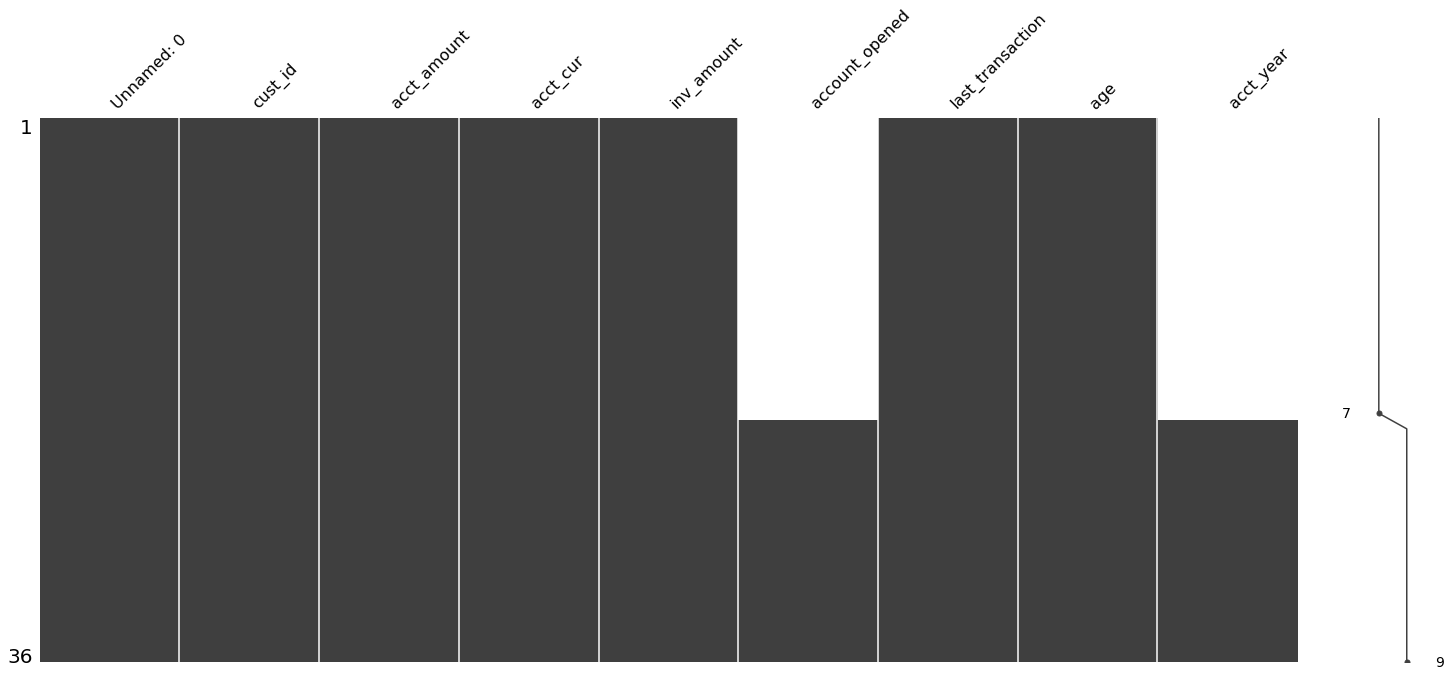

Unnamed: 0           0
cust_id              0
acct_amount          0
acct_cur             0
inv_amount           0
account_opened      20
last_transaction     0
age                  0
acct_year           20
dtype: int64


In [4]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(banking)
plt.show()
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]
# Sort banking by age and visualize
banking_sorted = banking.sort_values('age')
msno.matrix(banking_sorted)
plt.show()
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

In [53]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
fuzz.WRatio('Reading', 'Readingp- ')
restaurants= pd.read_csv('restaurants_L2.csv')
restaurants1= pd.read_csv('restaurants_L2.csv')

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))


typelist= ['italian', 'american', 'asian']

for a in typelist:
    matches = process.extract(a, restaurants1['type'], limit=len(restaurants1.type))

# Iterate through the list of matches to italian
    for match in matches:
      # Check whether the similarity score is greater than or equal to 80
      if match[1] >= 80:
        # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
        restaurants1.loc[restaurants1['type'] == match[0]] = a

#Replace the column
restaurants['type']= restaurants1['type']
print(restaurants['type'].unique())

[('asian', 100), ('asan', 89), ('italian', 67), ('american', 62), ('itallian', 62), ('americcan', 57), ('amerin', 55), ('italan', 55), ('italin', 55), ('america', 50), ('italyan', 50), ('americun', 46)]
[('american', 100), ('americcan', 94), ('america', 93), ('americun', 88), ('amerin', 86), ('asian', 62), ('italian', 53), ('asan', 50), ('itallian', 50), ('italan', 43), ('italin', 43), ('italyan', 40)]
[('italian', 100), ('itallian', 93), ('italan', 92), ('italin', 92), ('italyan', 86), ('asian', 67), ('asan', 55), ('american', 40), ('americcan', 38), ('amerin', 31), ('america', 29), ('americun', 27)]
['american' 'asian' 'italian']


In [59]:
import recordlinkage

restaurants_new= pd.read_csv('restaurants_L2_dirty.csv')

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new) 
print(potential_matches)
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

        city  type  name
0   0      0     1   0.0
    1      0     1   0.0
    7      0     1   0.0
    12     0     1   0.0
    13     0     1   0.0
...      ...   ...   ...
332 47     0     1   0.0
    57     0     1   0.0
    73     0     1   0.0
    75     0     1   0.0
    76     0     1   0.0

[4161 rows x 3 columns]
    Unnamed: 0                       name                       addr  \
0            0  arnie morton's of chicago   435 s. la cienega blv .    
1            1         art's delicatessen       12224 ventura blvd.    
2            2                  campanile       624 s. la brea ave.    
3            3                      fenix    8358 sunset blvd. west    
4            4         grill on the alley           9560 dayton way    
..         ...                        ...                        ...   
76          76                        don        1136 westwood blvd.   
77          77                      feast        1949 westwood blvd.   
78          78             